# 1: Logistic Regression

🔖 Problem Statement:
"Predict a house’s price based on its features like size, number of rooms, location score, and age."
This is a regression problem where the output is a continuous value (price in ₹ or $).

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
 # Sample Dataset (20 Rows)
 # Create a simple dataset
data = pd.DataFrame({
    'house_size_sqft': [1200, 1500, 1800, 850, 1350, 1700, 2000, 1000, 1450, 1600,
                        1100, 1400, 1250, 1900, 1750, 1300, 950, 1550, 1650, 1050],
    'bedrooms':        [2, 3, 3, 2, 3, 4, 4, 2, 3, 3,
                        2, 3, 2, 4, 4, 3, 2, 3, 3, 2],
    'location_score':  [7, 8, 9, 5, 7, 8, 10, 6, 8, 8,
                        6, 8, 7, 9, 9, 7, 5, 7, 8, 6],
    'house_age':       [10, 5, 2, 15, 8, 4, 1, 12, 6, 3,
                        11, 7, 9, 2, 3, 8, 14, 6, 4, 13],
    'price':           [30, 45, 55, 22, 38, 50, 65, 28, 43, 47,
                        29, 42, 35, 60, 53, 39, 25, 44, 48, 26]  # in lakhs
})


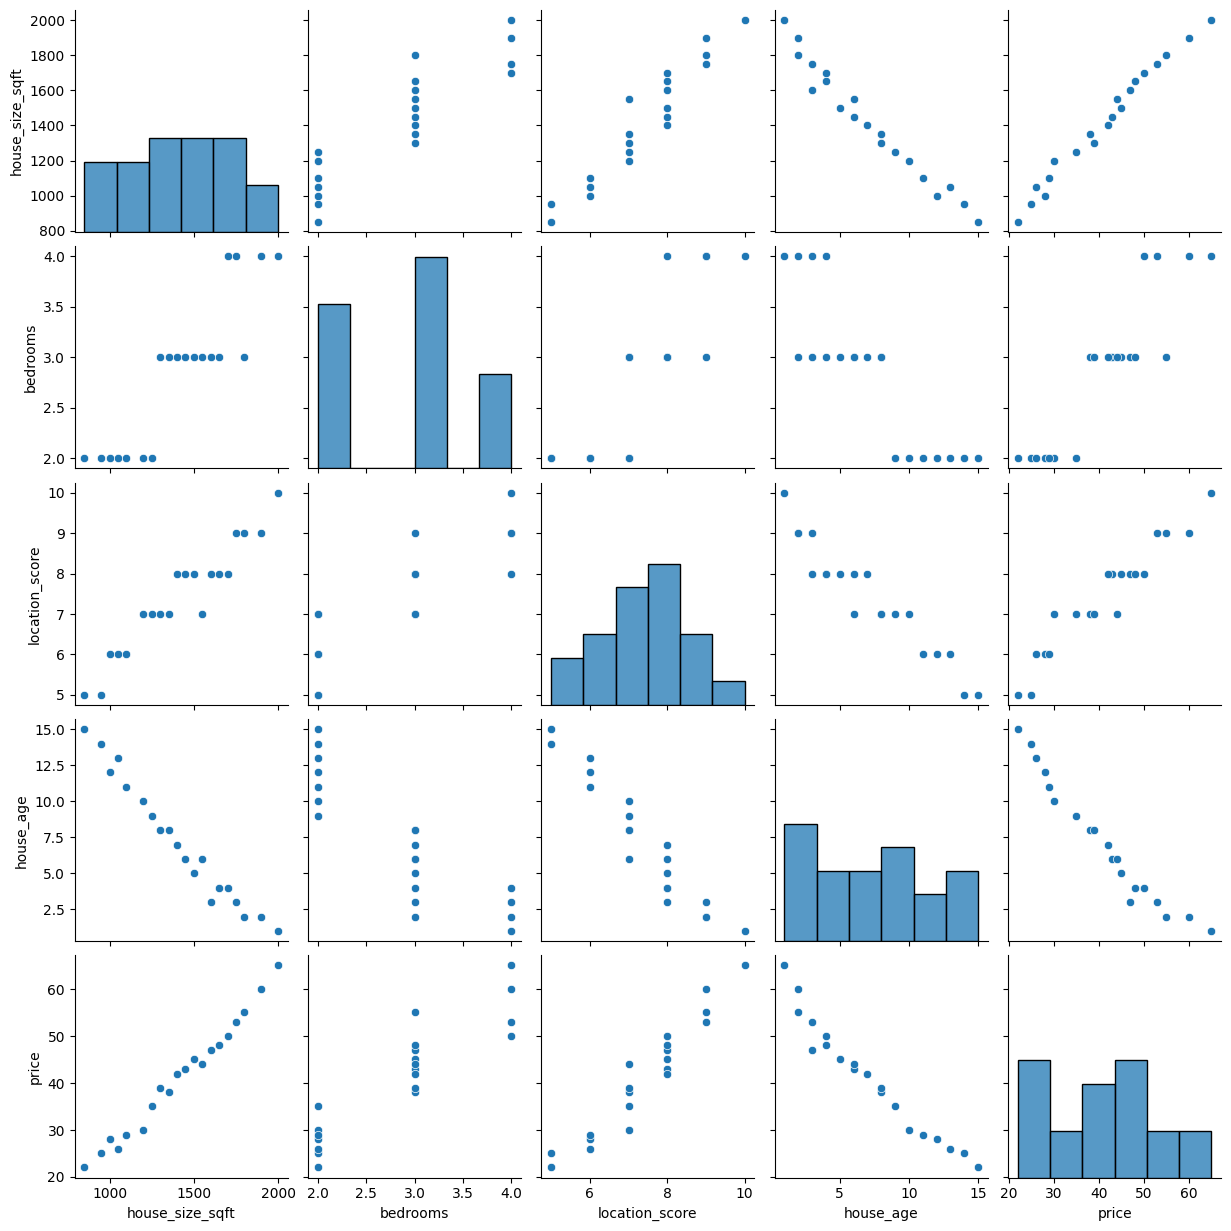

       house_size_sqft  bedrooms  location_score  house_age      price
count        20.000000  20.00000       20.000000   20.00000  20.000000
mean       1417.500000   2.85000        7.400000    7.15000  41.200000
std         329.782624   0.74516        1.353358    4.27077  12.133468
min         850.000000   2.00000        5.000000    1.00000  22.000000
25%        1175.000000   2.00000        6.750000    3.75000  29.750000
50%        1425.000000   3.00000        7.500000    6.50000  42.500000
75%        1662.500000   3.00000        8.000000   10.25000  48.500000
max        2000.000000   4.00000       10.000000   15.00000  65.000000
                 house_size_sqft  bedrooms  location_score  house_age  \
house_size_sqft         1.000000  0.900071        0.956372  -0.982900   
bedrooms                0.900071  1.000000        0.845472  -0.869088   
location_score          0.956372  0.845472        1.000000  -0.957951   
house_age              -0.982900 -0.869088       -0.957951   1.000000

In [4]:
# EDA (Exploratory Data Analysis)

sns.pairplot(data)
plt.show()

print(data.describe())
print(data.corr())


Check for:

Multicollinearity

Outliers

Linear trends between features and target (price)


In [5]:
# Feature & Target Split
X = data.drop('price', axis=1)
y = data['price']


In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [7]:
# Feature Scaling (Optional but Recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Train the Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [9]:
# Model Evaluation
y_pred = lr.predict(X_test_scaled)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 1.8682944920708486
Mean Squared Error (MSE): 5.597128238143505
Root Mean Squared Error (RMSE): 2.3658250649918107
R2 Score: 0.8412162201945105


In [10]:
# Interpret Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
print(coef_df)


           Feature  Coefficient
0  house_size_sqft    12.048985
1         bedrooms     0.329033
2   location_score     2.833806
3        house_age     2.357211


🔍 A positive coefficient means that increasing the feature increases the price.

✅ Pros:
Very interpretable

Fast to train

Useful for understanding feature impact

❌ Cons:
Assumes linear relationship

Sensitive to outliers & multicollinearity

Doesn’t capture complex patterns

📌 Use When:
Relationship between input & output is mostly linear

You need a baseline model

You care about feature importance



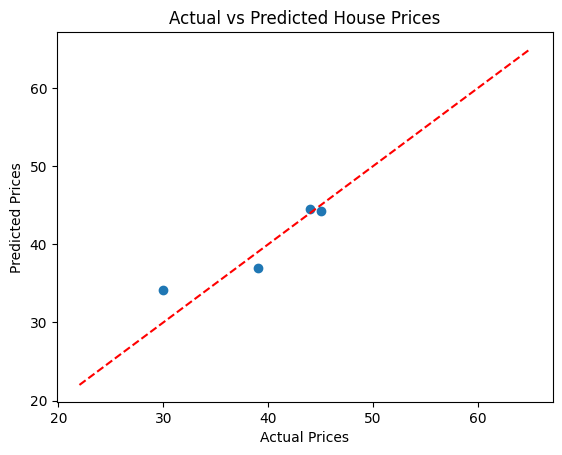

In [11]:
# Visualize Predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()



🎯 Let’s now enhance your Linear Regression model by applying hyperparameter tuning using Ridge and Lasso Regression — two popular regularized linear models.

✅ Why Use Ridge & Lasso?
📌 Problem with plain Linear Regression:
It overfits if features are correlated or if the dataset has high variance.

✅ Solution:
Ridge Regression (L2 regularization) → reduces model complexity but doesn’t eliminate features.

Lasso Regression (L1 regularization) → can shrink coefficients to zero, effectively selecting important features.

🧪 Let’s Try Both with Hyperparameter Tuning

In [12]:
# Import Required Libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV


In [13]:
#  1. Ridge Regression with GridSearchCV
# Define Ridge model with GridSearch for alpha tuning
ridge = Ridge()
params_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(ridge, params_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Best model and score
print("Best alpha (Ridge):", ridge_grid.best_params_)
print("Best score (Ridge):", -ridge_grid.best_score_)

# Evaluate on test set
ridge_best = ridge_grid.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_scaled)

print("R2 Score (Ridge):", r2_score(y_test, y_pred_ridge))


Best alpha (Ridge): {'alpha': 0.1}
Best score (Ridge): 2.699843665187101
R2 Score (Ridge): 0.8727661207648902


In [14]:
# 2. Lasso Regression with GridSearchCV
# Define Lasso model with GridSearch for alpha tuning
lasso = Lasso(max_iter=10000)
params_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso_grid = GridSearchCV(lasso, params_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

# Best model and score
print("Best alpha (Lasso):", lasso_grid.best_params_)
print("Best score (Lasso):", -lasso_grid.best_score_)

# Evaluate on test set
lasso_best = lasso_grid.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_scaled)

print("R2 Score (Lasso):", r2_score(y_test, y_pred_lasso))


Best alpha (Lasso): {'alpha': 0.1}
Best score (Lasso): 2.1772159782886966
R2 Score (Lasso): 0.8693982325735173


In [15]:
# Compare All Three Models
print("Linear Regression R2:", r2_score(y_test, lr.predict(X_test_scaled)))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))


Linear Regression R2: 0.8412162201945105
Ridge Regression R2: 0.8727661207648902
Lasso Regression R2: 0.8693982325735173


| Model             | Regularization | Best Use Case                        |
| ----------------- | -------------- | ------------------------------------ |
| Linear Regression | None           | Simple, interpretable relationships  |
| Ridge Regression  | L2             | **Collinearity**, reduce overfitting |
| Lasso Regression  | L1             | Feature selection, sparse models     |


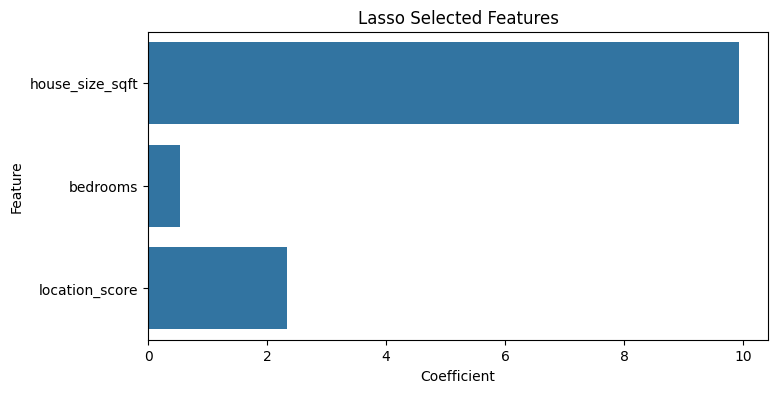

In [16]:
# plot feature importance from Lasso
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_best.coef_
})
coef_df = coef_df[coef_df['Coefficient'] != 0]

plt.figure(figsize=(8, 4))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title("Lasso Selected Features")
plt.show()
